In [2]:
import numpy as np   
import pandas as pd    
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib.pyplot as plt   
import matplotlib.style

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Apps_data.csv')

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Exploratory Data Analysis 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [5]:
df.shape

(10841, 13)

### Checking for Missing Values

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Checking Summary Statistics

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,5.374313e-01,1.0,4.0,4.3,4.5,19.0
Reviews,10841.0,444111.926575,2.927629e+06,0.0,38.0,2094.0,54768.0,78158306.0


In [8]:
df.describe(include=object).T

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326
Current Ver,10833,2784,Varies with device,1459


In [9]:
df.duplicated().sum()

483

### Imputing the missing values for  the Rating column

In [10]:
from sklearn.impute import KNNImputer
impute = KNNImputer()
df['Rating'] = impute.fit_transform(df[['Rating']])
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Checking for the Garbage Values

In [13]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts(normalize=True))
        print('*'*35)
        

App
App
ROBLOX                                                0.000831
CBS Sports App - Scores, News, Stats & Watch Live     0.000739
Candy Crush Saga                                      0.000646
8 Ball Pool                                           0.000646
ESPN                                                  0.000646
                                                        ...   
Meet U - Get Friends for Snapchat, Kik & Instagram    0.000092
U-Report                                              0.000092
U of I Community Credit Union                         0.000092
Waiting For U Launcher Theme                          0.000092
iHoroscope - 2018 Daily Horoscope & Astrology         0.000092
Name: proportion, Length: 9648, dtype: float64
***********************************
Category
Category
FAMILY                 0.181734
GAME                   0.105642
TOOLS                  0.077662
MEDICAL                0.042756
BUSINESS               0.042479
PRODUCTIVITY           0.039154
PERSON

In [14]:
df['Rating']

0        4.100000
1        3.900000
2        4.700000
3        4.500000
4        4.300000
           ...   
10836    4.500000
10837    5.000000
10838    4.193338
10839    4.500000
10840    4.500000
Name: Rating, Length: 10829, dtype: float64

In [15]:
df['Rating_category'] = df['Rating'] > 3.5

In [16]:
df[df['Rating_category']].head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,True
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,True
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,True
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,True
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,True
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up,True
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,True
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,True
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,True
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,True


In [17]:
df['Rating_category'].describe()

count     10829
unique        2
top        True
freq       9934
Name: Rating_category, dtype: object

1. Here all the float value convert into True and False.
2. The data type is still object.
3. The top Rating Category is True. 

In [18]:
df['Reviews'].describe()

count    1.082900e+04
mean     4.446018e+05
std      2.929213e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.100000e+03
75%      5.481500e+04
max      7.815831e+07
Name: Reviews, dtype: float64

<Axes: xlabel='Reviews'>

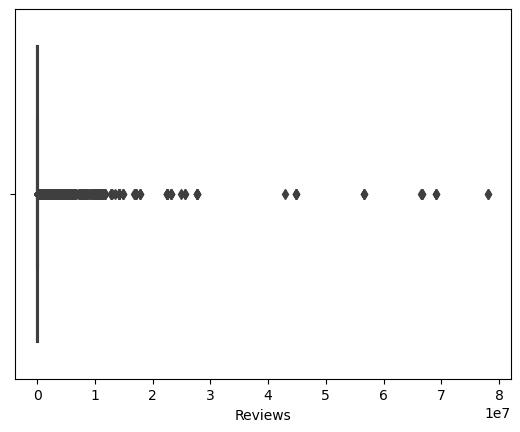

In [19]:
sns.boxplot(df,x='Reviews')

16.441352870562515


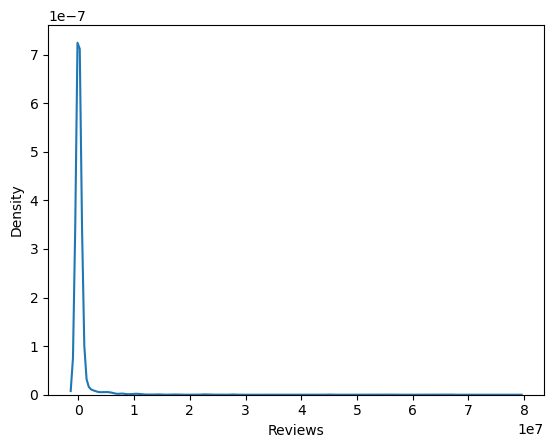

In [20]:
sns.kdeplot(df,x='Reviews')

print(df['Reviews'].skew())

nan


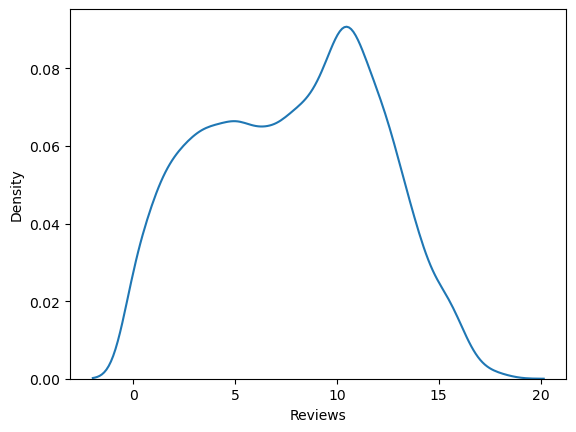

In [21]:
sns.kdeplot(np.log(df['Reviews']))
print(np.log(df['Reviews']).skew())

### Converting all the Objects variable into sutiable datatype

In [22]:
df["Size"].replace("M","000000", regex=True, inplace = True)
df["Size"].replace("k","000", regex=True, inplace = True)

In [23]:
df['Size'].unique()

array(['19000000', '14000000', '8.7000000', '25000000', '2.8000000',
       '5.6000000', '29000000', '33000000', '3.1000000', '28000000',
       '12000000', '20000000', '21000000', '37000000', '5.5000000',
       '17000000', '39000000', '31000000', '4.2000000', '7.0000000',
       '23000000', '6.0000000', '6.1000000', '4.6000000', '9.2000000',
       '5.2000000', '11000000', '24000000', 'Varies with device',
       '9.4000000', '15000000', '10000000', '1.2000000', '26000000',
       '8.0000000', '7.9000000', '56000000', '57000000', '35000000',
       '54000000', '201000', '3.6000000', '5.7000000', '8.6000000',
       '2.4000000', '27000000', '2.7000000', '2.5000000', '16000000',
       '3.4000000', '8.9000000', '3.9000000', '2.9000000', '38000000',
       '32000000', '5.4000000', '18000000', '1.1000000', '2.2000000',
       '4.5000000', '9.8000000', '52000000', '9.0000000', '6.7000000',
       '30000000', '2.6000000', '7.1000000', '3.7000000', '22000000',
       '7.4000000', '6.4000000

In [24]:
df['Size']=df['Size'].replace("Varies with device",np.nan)

In [25]:
df.Size = pd.to_numeric(df.Size)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              10829 non-null  object 
 1   Category         10829 non-null  object 
 2   Rating           10829 non-null  float64
 3   Reviews          10829 non-null  int64  
 4   Size             9135 non-null   float64
 5   Installs         10829 non-null  object 
 6   Type             10829 non-null  object 
 7   Price            10829 non-null  object 
 8   Content Rating   10829 non-null  object 
 9   Genres           10829 non-null  object 
 10  Last Updated     10829 non-null  object 
 11  Current Ver      10829 non-null  object 
 12  Android Ver      10829 non-null  object 
 13  Rating_category  10829 non-null  bool   
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [27]:
from sklearn.impute import KNNImputer
impute = KNNImputer()
df['Size'] = impute.fit_transform(df[['Size']])
df.isnull().sum()

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        0
Android Ver        0
Rating_category    0
dtype: int64

In [28]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [29]:
df.Installs = df.Installs.apply(lambda x:x.replace("+",""))
df.Installs = df.Installs.apply(lambda x:x.replace(",",""))
df.Installs = df.Installs.apply(lambda x:int(x))

In [30]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

In [31]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [32]:
df.Price = df.Price.apply(lambda x:x.replace("$",""))
df.Price = df.Price.apply(lambda x:float(x))

In [33]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [34]:
df.drop(columns='Rating',axis=1,inplace=True)

In [35]:
df.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,True
1,Coloring book moana,ART_AND_DESIGN,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,True
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,True
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,True
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,True


In [36]:
df.columns

Index(['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

In [37]:
df.drop(columns=['App','Last Updated','Current Ver','Genres','Android Ver','Category'],axis=1,inplace=True)

In [38]:
df.columns

Index(['Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating',
       'Rating_category'],
      dtype='object')

In [39]:
df['Rating_category'].replace(['True','False'],[True,False],inplace=True)

In [40]:
df['Type'].replace(['Free','Paid'],[True,False],inplace=True)

In [42]:
df['Content Rating'] = df['Content Rating'].apply(lambda x:x.replace("+",""))
df['Content Rating'] = df['Content Rating'].apply(lambda x:x.replace(",",""))

In [43]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10', 'Mature 17', 'Adults only 18',
       'Unrated'], dtype=object)

In [44]:
dummies = pd.get_dummies(df, drop_first=True)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Reviews                     10829 non-null  int64  
 1   Size                        10829 non-null  float64
 2   Installs                    10829 non-null  int64  
 3   Type                        10829 non-null  bool   
 4   Price                       10829 non-null  float64
 5   Rating_category             10829 non-null  bool   
 6   Content Rating_Everyone     10829 non-null  bool   
 7   Content Rating_Everyone 10  10829 non-null  bool   
 8   Content Rating_Mature 17    10829 non-null  bool   
 9   Content Rating_Teen         10829 non-null  bool   
 10  Content Rating_Unrated      10829 non-null  bool   
dtypes: bool(7), float64(2), int64(2)
memory usage: 497.0 KB


In [45]:
X = dummies.drop('Rating_category', axis=1)
y = dummies['Rating_category']

### Spliting the dataset into Train and Test 

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

In [47]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

import statsmodels.api as sm
logit = LogisticRegression(solver = 'newton-cg', n_jobs=-1, class_weight={0:0.09, 1:0.91})
logit.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.09, 1: 0.91}, n_jobs=-1,
                   solver='newton-cg')

In [48]:
pred_train = logit.predict(X_train)
pred_test = logit.predict(X_test)

In [49]:
print(classification_report(y_train, pred_train)); print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00       626
        True       0.92      1.00      0.96      6954

    accuracy                           0.92      7580
   macro avg       0.46      0.50      0.48      7580
weighted avg       0.84      0.92      0.88      7580

              precision    recall  f1-score   support

       False       0.00      0.00      0.00       269
        True       0.92      1.00      0.96      2980

    accuracy                           0.92      3249
   macro avg       0.46      0.50      0.48      3249
weighted avg       0.84      0.92      0.88      3249



In [49]:
X_c = sm.add_constant(X)

X_train_c, X_test_c, y_train, y_test = train_test_split(X_c, y, test_size = 0.3, random_state=42, stratify=y)

In [54]:
import warnings
warnings.filterwarnings('ignore')

model = sm.Logit(y_train, X_train_c.astype(float)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.260834
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Rating_category   No. Observations:                 7580
Model:                          Logit   Df Residuals:                     7577
Method:                           MLE   Df Model:                            2
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                 0.08492
Time:                        12:19:22   Log-Likelihood:                -1977.1
converged:                       True   LL-Null:                       -2160.6
Covariance Type:            nonrobust   LLR p-value:                 2.077e-80
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4479      0.163     15.051      0.000       2.129       2.767
Reviews     2.644e-05   3.11e-06      8.495      0.000    2.03e-05    3.25e-05
Type          -0.5147      0.169     -3.051      0.002      -0.845      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [53]:
X_train_c.drop(['Installs'], axis=1, inplace=True)

In [55]:
X_test_c.drop(['Content Rating_Everyone','Content Rating_Everyone 10','Content Rating_Mature 17','Content Rating_Teen','Content Rating_Unrated','Price','Size','Installs'], axis=1, inplace=True)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series(
    [variance_inflation_factor(X_train_c.values.astype(float), i) for i in range(X_train_c.shape[1])],
    index=X_train_c.columns,
    dtype=float)

vif_series

const                         2543.000130
Reviews                          1.844653
Size                             1.056863
Installs                         1.827374
Type                             1.062083
Price                            1.056752
Content Rating_Everyone        400.871749
Content Rating_Everyone 10      91.803620
Content Rating_Mature 17       112.537855
Content Rating_Teen            254.796976
Content Rating_Unrated           1.666458
dtype: float64

In [56]:
pred_prob = model.predict(X_test_c.astype(float))
pred_class = np.where(pred_prob >= 0.1, 1, 0)

In [57]:
print(classification_report(y_test, pred_class))


              precision    recall  f1-score   support

       False       0.00      0.00      0.00       269
        True       0.92      1.00      0.96      2980

    accuracy                           0.92      3249
   macro avg       0.46      0.50      0.48      3249
weighted avg       0.84      0.92      0.88      3249

